# Regressão Linear para Inferencia

Carregando bibliotecas

In [1]:
!pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.7 MB/s eta 0:00:00


In [7]:
import pandas as pd
from wooldridge import *
import statsmodels.formula.api as smf

- sat: pontuação SAT combinada(antes da faculdade)
- tothrs: total de horas até o semestre de outono
- colgpa: GPA após o semestre de outono(nota no faculdade)
- atleta: =1 se atleta
- verbmath: pontuação SAT verbal/matemática
- hsize: graduação de tamanho. classe, 100s
- hsrank: classificação na graduação. aula
- hsperc: percentil do ensino médio, do topo
- feminino: =1 se feminino
- branco: =1 se branco
- preto: =1 se preto
- hsizesq: hsize^2

In [8]:
# Carregando dados
gpa = dataWoo('gpa2')
gpa.head()

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,0.010000
1,1170,18,4.00,0,0.82813,9.40,191,20.319149,0,1,0,88.360001
2,810,14,1.78,1,0.88372,1.19,42,35.294117,0,1,0,1.416100
3,940,40,2.42,0,0.80769,5.71,252,44.133099,0,1,0,32.604099
4,1180,18,2.61,0,0.73529,2.14,86,40.186916,0,1,0,4.579600


Vamos verificar como a posição do aluno durante o colégio (hsperc) e sua nota do SAT se relacionam com seu GPA. Queremos entender se existe relação entre desempenho na adolescência tem relação com desempenho na faculdade, se o aluno ter ido bem na escola e no "vestibular" tem relação com desempenho na universidade. Ou seja, queremos estimar a seguinte equação:

In [9]:
# ~ significa =, ou seja, vamos fazer uma relação de explicar o GPA(nota na faculdade) a partir do hsperc e SAT, ambos antes da faculdade
results = smf.ols('colgpa ~ hsperc + sat', data=gpa).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.77e-287
Time:                        13:35:03   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

Olhando para a coluna COEF, podemos identificar os coeficientes das variaveis

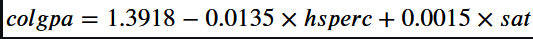

Avalidando a regressão
- P valor: Este p-valor indica a probabilidade de obter um resultado igual ou mais extremo do que o observado a partir do acaso ou testes de reamostragem, assumindo que a hipótese nula seja verdadeira. o P valor ser superior a 0.05 indica que a hipotese nula está verdadeia, ou seja, nossos coeficientes são o mesmo que 0. Como nossos p's foram todos 0, siginifcia que nao foi possivel obter um resultaso igual ao extremo observavel e negamos a hipotese nula
- R-quadrado: é uma das métricas mais importantes quando estamos falando de inferência. é uma medida estatística usada para avaliar a qualidade de ajuste do nosso modelo. Ele varia entre 0 e 1 e descreve a porcentagem da variância da variável dependente que as variáveis independentes explicam coletivamente, ou seja, **QUANTO DO TARGET É EXPLICADO**
- AVALIANDO O MODELO COMO UM TODO: F-Statistic: Significância do modelo. A estatística F é uma medida estatística utilizada na análise de regressão linear para avaliar a significância global do modelo

# Avaliando uma regressão linear

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('DataBase\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


A variavel que queremos prever é a charges, a respeito de gastos com saude

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.shape

(1338, 7)

<Axes: xlabel='charges', ylabel='Count'>

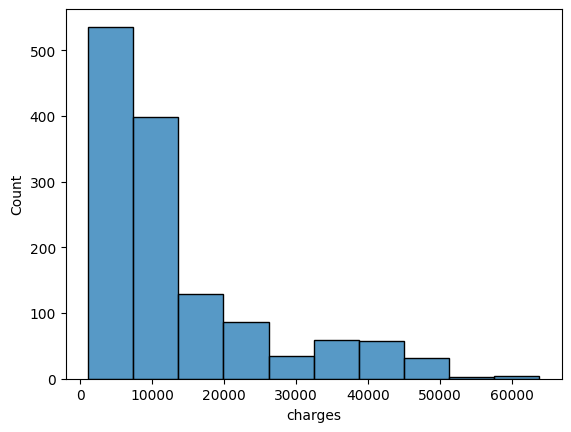

In [21]:
import seaborn as sns

sns.histplot(data=df, x='charges', bins=10, kde=False)

Dividindo os dados em treino e teste e separando as variaveis categoricas e numericas

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

Nesse caso como todas as colunas que tem o tipo primitivo como numerico podem ser consideradas variaveis numericas, podemos separas as features da seguinte forma:

In [44]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numerical_features

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

Criando o pipeline de preprocessamento

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

# Pipe line tanto para as features numericas e categorical
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ecoder', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('categorical_transformer', categorical_pipe, categorical_features),
    ('numerical_trasformer', numerical_pipe, numerical_features)
])

Modelagem

In [56]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

model = Pipeline([
    ('preprocessor', transformer),
    ('regressor', lgb.LGBMRegressor(force_col_wise=True, random_state=42))
])

Validando o modelo


In [57]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error, 
    mean_absolute_percentage_error

)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'mse: {mse:.2f}')
print(f'rmse: {rmse:.2f}')
print(f'mape: {mape:.2f}')

[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
MAE: 2608.68
mse: 20815018.32
rmse: 4562.35
mape: 0.34


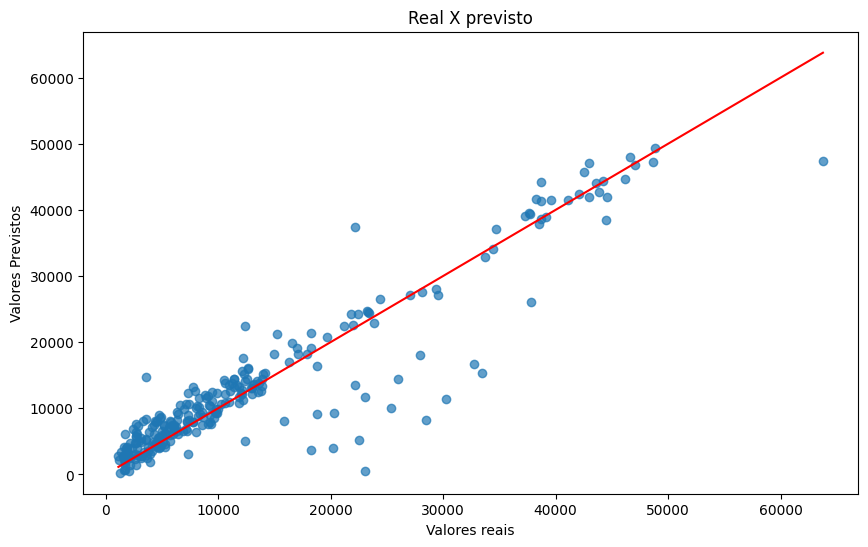

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Real X previsto')
plt.show()

Testando aplicação da função logaritimo no target para reduzir assimetria nos dados

In [33]:
model.fit(X_train, np.log(y_train))

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.log(y_test), y_pred)
mse = mean_squared_error(np.log(y_test), y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(np.log(y_test), y_pred)

print(f'MAE: {mae:.2f}')
print(f'mse: {mse:.2f}')
print(f'rmse: {rmse:.2f}')
print(f'mape: {mape:.2f}')

[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 9.113322
MAE: 0.21
mse: 0.14
rmse: 0.38
mape: 0.02


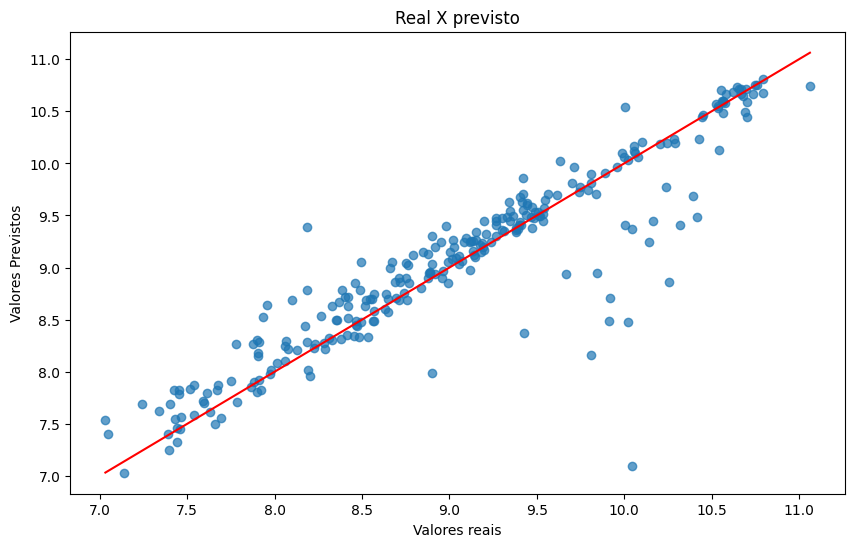

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(np.log(y_test), y_pred, alpha=0.7)
plt.plot([min(np.log(y_test)), max(np.log(y_test))], [min(np.log(y_test)), max(np.log(y_test))], color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Real X previsto')
plt.show()

Aparentemente temos uma curva mais simetrica

Analisando a correlação entre features e target

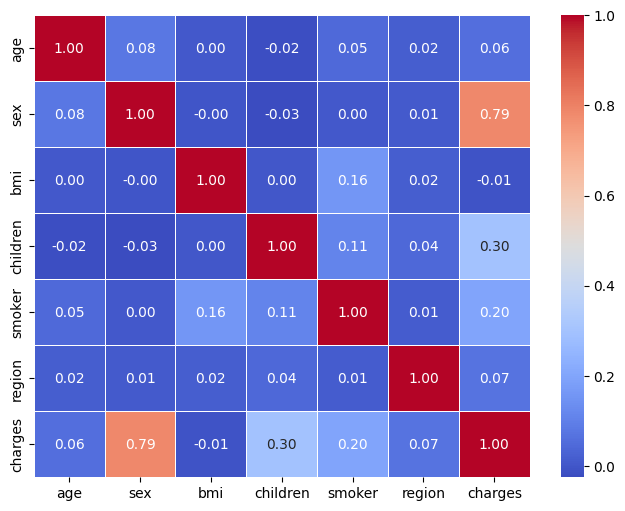

In [41]:
from sklearn.preprocessing import OrdinalEncoder

# Criando o ColumnTransformer
ordinalTransformer = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Mantém as colunas não especificadas inalteradas
)

X_transformed = ordinalTransformer.fit_transform(X)

X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

corr_df = pd.concat([X_transformed_df, y], axis=1)
correlation_matrix = corr_df.corr()

# Criando o mapa de calor usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

Aparentemente temos poucas correlações entre as features e o target, vamos tentar aplixar polynomial featurees para tentar achar algumas relação lineartes

- Depois de testes não foram obtidos resultados positivos